# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

# Ваш код здесь
A = np.arange(100).reshape((10, 10))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [4]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
np.mean(A, axis = 0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [5]:
# Транспонируйте матрицу A

# Ваш код здесь
A1 = A.T
A1

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [6]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
A * A1

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [7]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

# Ваш код здесь
B = np.dot(A, A1)
B

array([[  285,   735,  1185,  1635,  2085,  2535,  2985,  3435,  3885,
         4335],
       [  735,  2185,  3635,  5085,  6535,  7985,  9435, 10885, 12335,
        13785],
       [ 1185,  3635,  6085,  8535, 10985, 13435, 15885, 18335, 20785,
        23235],
       [ 1635,  5085,  8535, 11985, 15435, 18885, 22335, 25785, 29235,
        32685],
       [ 2085,  6535, 10985, 15435, 19885, 24335, 28785, 33235, 37685,
        42135],
       [ 2535,  7985, 13435, 18885, 24335, 29785, 35235, 40685, 46135,
        51585],
       [ 2985,  9435, 15885, 22335, 28785, 35235, 41685, 48135, 54585,
        61035],
       [ 3435, 10885, 18335, 25785, 33235, 40685, 48135, 55585, 63035,
        70485],
       [ 3885, 12335, 20785, 29235, 37685, 46135, 54585, 63035, 71485,
        79935],
       [ 4335, 13785, 23235, 32685, 42135, 51585, 61035, 70485, 79935,
        89385]])

#### Не меняйте следующую ячейку. Просто запустите ее.

In [8]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [9]:
import pandas as pd

In [10]:
# If on colab, uncomment the following lines

# !wget "https://downloader.disk.yandex.com/disk/cd3ead013809a9da37434c792796d4b063dfc89571c68c273ca3788013b82bf8/5d865a2d/8bfV6Unxao6CYWcER5-G5fza25GZaFjE_xFvc0-ExCwlqmFjBf2bynRfBnL6ubJC8XhsoYHi7h9Nu6gfvS8wxg%3D%3D?uid=76549735&filename=forest_dataset.csv&disposition=attachment&hash=&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=76549735&fsize=1293856&hid=9b439c18e67923b45c3b3d8891bdf9ab&media_type=spreadsheet&tknv=v2&etag=45e530aa3c9796cb705d4e27be7a6e9c" -O forest_dataset.csv

In [11]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [12]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [13]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
two_class_labels_indices = (labels == 1) + (labels == 2)
two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [17]:
(train_feature_matrix,
test_feature_matrix,
train_labels,
test_labels) = train_test_split(two_class_feature_matrix, two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [18]:
# Ваш код здесь
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000, n_jobs =-1)

In [19]:
lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predicted_labels = lr_clf.predict(test_feature_matrix)

In [21]:
acc = accuracy_score(test_labels, predicted_labels)
print('acc = ', acc)
f1 = f1_score(test_labels, predicted_labels)
print('f1 = ', f1)

acc =  0.7590431738623103
f1 =  0.7121951219512196


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [22]:
# Ваш код здесь
(train_features,
test_features,
train_labels,
test_labels) = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# Ваш код здесь
lr_clf = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, n_jobs =-1)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
predicted_labels = lr_clf.predict(test_features)

In [26]:
acc = accuracy_score(test_labels, predicted_labels)
print('acc = ', acc)

acc =  0.718125


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [27]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

In [28]:
cross_valid = 5
pg = {'C': np.linspace(0.01, 1, 10), 'penalty': ['l1', 'l2']}

In [29]:
ratio = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)

In [30]:
grid_search = GridSearchCV(estimator=ratio, n_jobs = -1, param_grid=pg, cv=cross_valid)
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid_search.best_params_

{'C': 0.12, 'penalty': 'l1'}

In [32]:
grid_search.cv_results_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

{'mean_fit_time': array([ 8.48968563,  7.52263026, 55.40876918, 18.5276598 , 71.72970271,
        25.73727212, 84.08300924, 29.73190055, 89.46951733, 33.61672268,
        91.22901802, 36.10306501, 91.72804651, 38.92282629, 91.6330411 ,
        40.26370301, 92.22847524, 41.39536762, 94.74361906, 41.5631772 ]),
 'std_fit_time': array([0.26593956, 0.28344059, 0.66307207, 0.21056522, 5.0908615 ,
        0.77387454, 3.23213994, 1.29096994, 3.8306376 , 1.02063289,
        3.53596225, 1.61591701, 3.14249458, 0.82535822, 2.95252539,
        1.08337646, 3.23313628, 1.5635995 , 3.78809482, 2.00001788]),
 'mean_score_time': array([0.00660033, 0.00040002, 0.00100012, 0.00099998, 0.00100007,
        0.00100007, 0.00100007, 0.00100017, 0.00100021, 0.00099998,
        0.00100012, 0.00080009, 0.00100007, 0.0006    , 0.00100002,
        0.00079999, 0.00100012, 0.00100012, 0.00100002, 0.00100007]),
 'std_score_time': array([9.70840945e-03, 4.89920847e-04, 9.53674316e-08, 9.53674316e-08,
        1.907348

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [33]:
# Ваш код здесь
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
x = pg['C']
l1 = [grid_search.cv_results_['mean_test_score'][2*n] for n in range(10)]
l2 = [grid_search.cv_results_['mean_test_score'][2*n+1] for n in range(10)]

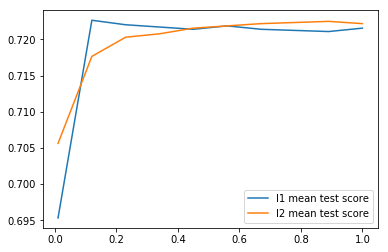

In [35]:
plt.plot(x, l1, label='l1 mean test score')
plt.plot(x, l2, label='l2 mean test score')
plt.legend()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [36]:
# Ваш код здесь
grid_search.best_params_

{'C': 0.12, 'penalty': 'l1'}

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [37]:
# Ваш код здесь
best_lr_clf = LogisticRegression(solver='saga', multi_class='multinomial', n_jobs =-1, max_iter=10000, C=0.12, penalty='l1')
best_lr_clf.fit(train_features, train_labels)

LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predicted_proba = best_lr_clf.predict_proba(test_features)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [39]:
# Ваш код здесь
np.mean(predicted_proba, axis=0)

array([0.37300179, 0.48759277, 0.06192525, 0.00596349, 0.01619343,
       0.02746148, 0.02786179])

In [40]:
def counter(a):
    b = dict()
    for x in a:
        if x in b:
            b[x] = b[x] + 1
        else:
            b[x] = 1
    return b

In [41]:
counted_labels = counter(test_labels)
S = sum(counted_labels.values())
S

1600

In [42]:
counted_labels_proba = {key: counted_labels[key]/S for key in counted_labels.keys()}
counted_labels_proba

{1: 0.378125,
 2: 0.478125,
 7: 0.029375,
 3: 0.06625,
 4: 0.004375,
 6: 0.03,
 5: 0.01375}

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Ваш код здесь
knclassifier = KNeighborsClassifier(weights='distance')
knclassifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [45]:
predicted_labels = knclassifier.predict(test_features)
accuracy_score(test_labels, predicted_labels)

0.738125

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [46]:
# Ваш код здесь
knclassifier = KNeighborsClassifier(weights='distance')
knn_grid = {'n_neighbors': range(1, 11)}
cross_valid = 5

In [47]:
knn_grid_search = GridSearchCV(estimator=knclassifier, cv=cross_valid, param_grid=knn_grid, n_jobs=-1)
knn_grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [48]:
knn_grid_search.cv_results_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

{'mean_fit_time': array([0.08120465, 0.07740436, 0.07700434, 0.08140464, 0.07660427,
        0.08360486, 0.09000516, 0.08180461, 0.08080459, 0.08100462]),
 'std_fit_time': array([0.00416679, 0.00149676, 0.00126501, 0.00463053, 0.0004898 ,
        0.00640674, 0.01260223, 0.00312421, 0.00074826, 0.00126501]),
 'mean_score_time': array([0.61983547, 0.6480371 , 0.63823652, 0.6512373 , 0.64123669,
        0.73644199, 0.74584265, 0.6644381 , 0.66123772, 0.67763877]),
 'std_score_time': array([0.00649338, 0.03081727, 0.00902055, 0.01990502, 0.00552841,
        0.06118712, 0.13452509, 0.02838195, 0.00990805, 0.0141513 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


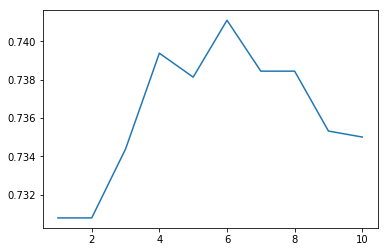

In [49]:
plt.plot(range(1, 11), knn_grid_search.cv_results_['mean_test_score'])

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [50]:
# Ваш код здесь
knn_grid_search.predict_proba(test_features)

array([[0.82078436, 0.17921564, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.87162401, 0.12837599, ..., 0.        , 0.        ,
        0.        ],
       [0.84729505, 0.15270495, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43765227, 0.56234773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48160727, 0.51839273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [51]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance', n_jobs =-1)
best_knn_clf.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='distance')

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [52]:
# Ваш код здесь
delayed_feature_matrix = scaler.transform(delayed_feature_matrix)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
lf_accuracy = accuracy_score(delayed_labels, best_lr_clf.predict(delayed_feature_matrix))
print('lf_accuracy = ', lf_accuracy)
knn_accuracy = accuracy_score(delayed_labels, best_knn_clf.predict(delayed_feature_matrix))
print('knn_accuracy = ', knn_accuracy)

lf_accuracy =  0.724
knn_accuracy =  0.7335


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [54]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)